In [85]:
# sample.py
import ctypes
import os
import threading
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
matplotlib.style.use('ggplot')
import math
import concurrent.futures
import glob
import json
import scipy as sp
import scipy.special
from matplotlib.ticker import FormatStrFormatter
from itertools import chain

# Graphs for simulation results

## Read results of multiple simulations.

In [190]:
data_mode = 'MA'

In [191]:
test_mode = 'Apr-25-2017/EEModel/RelBaseLearn08/'
test_name = 'RelBaseLearn08'

In [192]:
#names of columns in a file
names = ['N_installed', 'N_installed_sum', 'P_av_total', 'P_av']
for i in range(3):
    names.append('sei_' + str(i))
for i in range(3):
    names.append('sei_rel_' + str(i))
for i in range(7):
    names.append('sem_' + str(i))
for i in range(7):
    names.append('sem_rel_' + str(i))
for i in range(3):
    names.append('sei_N_' + str(i))


#read few files
#save into database
dfs_ = []
#read last simulation result
files = glob.glob('/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Saves/' + test_mode + data_mode + '/*[_w].csv')
files.sort(key=os.path.getmtime, reverse=True)




indexing_range = range(0,100)

#take top x files 
for file in [files[i] for i in indexing_range]:
    df_ = pd.read_csv(file, names=names, low_memory=False, \
                     na_values = ['-nan(ind)'])
    
     #create new column with max and min
    df_['sem_max'] = df_[['sem_' + str(i) for i in range(7)]].max(axis=1)
    df_['sem_rel_min'] = df_[['sem_rel_' + str(i) for i in range(7)]].min(axis=1)
    df_['sei_max'] = df_[['sei_' + str(i) for i in range(3)]].min(axis=1)
    df_['sei_rel_min'] = df_[['sei_rel_' + str(i) for i in range(3)]].min(axis=1)
    
    dfs_.append(df_)
    

    
#create df from them    
df_concat = pd.concat(dfs_)
df = df_concat.groupby(level=0).mean()
df_std = df_concat.groupby(level=0).std()

#alternative way to calculate means
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,N_installed,N_installed_sum,P_av_total,P_av,sei_0,sei_1,sei_2,sei_rel_0,sei_rel_1,sei_rel_2,...,sem_rel_4,sem_rel_5,sem_rel_6,sei_N_0,sei_N_1,sei_N_2,sem_max,sem_rel_min,sei_max,sei_rel_min
0,6.32,6.32,3.529771,3.560882,0.176443,0.176466,0.176129,0.214563,0.198660,0.218917,...,0.260137,0.220585,0.257514,2.15,2.21,1.96,0.221515,0.074906,0.160516,0.164794
1,7.47,13.79,3.291028,3.327979,0.183783,0.183042,0.183976,0.331123,0.261329,0.287232,...,0.363290,0.303303,0.357325,4.63,4.94,4.22,0.233370,0.049735,0.165977,0.120941
2,8.50,22.29,2.976772,3.035050,0.194193,0.192587,0.187640,0.361251,0.826455,0.348163,...,0.488852,0.452102,0.390336,7.57,7.63,7.09,0.243529,0.036357,0.171560,0.150635
3,8.42,30.71,2.909159,2.950816,0.205327,0.198462,0.193893,0.459802,0.972150,0.671199,...,0.895787,0.583267,0.605624,10.36,10.36,9.99,0.256065,0.033527,0.176167,0.135429
4,8.05,38.76,2.910351,2.956162,0.214969,0.202085,0.199696,0.815457,0.996402,0.860331,...,1.020705,0.843151,0.748197,13.16,12.92,12.68,0.267333,0.028110,0.180406,0.132501


In [193]:
#names of columns in a file
names = ['Income', 'ElectricityBill', 'House_size', 'TimeInstalled', 'bInstalled']


#read few files
#save into database
dfs_hos_ = []
#read last simulation result
#files = glob.glob('../../ABMIRISLab/Saves/EEModel/*.csv')
files = glob.glob('/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Saves/' + test_mode + data_mode + '/*[_hos].csv')
files.sort(key=os.path.getmtime, reverse=True)

indexing_range = range(0,100)

#take top x files 
for file in [files[i] for i in indexing_range]:
    df_ = pd.read_csv(file, names=names, low_memory=False)
    dfs_hos_.append(df_.reset_index(drop=True))

#create df from them    
df_hos_concat = pd.concat(dfs_hos_, axis=0, ignore_index=True)

df_hos_concat.describe()

,Income,ElectricityBill,House_size,TimeInstalled,bInstalled
count,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000
mean,1.704036e+05,159.099068,2729.545369,1.18420,0.140710
std,1.751168e+05,101.349957,2121.504948,3.64287,0.347724
min,5.334300e-01,0.009958,5.279040,-1.00000,0.000000
25%,6.789988e+04,88.207025,1632.255000,0.00000,0.000000
50%,1.202800e+05,137.925000,2335.635000,0.00000,0.000000
75%,2.044392e+05,206.755250,3292.195000,0.00000,0.000000
max,4.226260e+06,3243.710000,68925.400000,19.00000,1.000000


In [194]:
bins_income = [0, 2499, 4999, 7499, 9999, \
    14999, 19999, 24999, 29999, 34999, 39999, \
    44999, 49999, 54999, 59999, 64999, \
        69999, 74999, 79999, 84999, 89999, \
        94999, 99999, 119999, np.inf]

In [195]:
#recreates bins for income for raw data
df_hos_concat['Income_C'] = pd.cut(df_hos_concat['Income'], \
                                   bins = bins_income, labels = False, retbins=True)[0]


y_1 = df_hos_concat.groupby('Income_C')['bInstalled'].mean()
y_1_std = df_hos_concat.groupby('Income_C')['bInstalled'].std()


In [196]:
bins_elect = np.array([0.0, 2500.0, 5000.0, 7500.0, 10000.0, 12500.0, \
                       15000.0, 17500.0, 20000.0, 22500.0, 25000.0, \
                       30000.0, 35000.0, 40000.0, 50000.0, 75000.0, np.inf], dtype = np.float32)
ELECTRICITY_PRICE_US_DEMAND = 0.15
bins_elect_adj = bins_elect*ELECTRICITY_PRICE_US_DEMAND/365.25*30

In [197]:
df_hos_concat['ElectricityBill_C'] = pd.cut(df_hos_concat['ElectricityBill'], \
                                   bins = bins_elect_adj, labels = False, retbins=True)[0]
y_2 = df_hos_concat.groupby('ElectricityBill_C')['bInstalled'].mean()
y_2_std = df_hos_concat.groupby('ElectricityBill_C')['bInstalled'].std()

for i in range(len(bins_elect_adj)):
    if not (i in y_2.index.values):
        y_2.loc[i] = 0.0
        
y_2 = y_2.sort_index()

## Draw penetration in time

### New Version.

### Preparing raw data

In [198]:
N_SIMULATION_TICKS = 20

In [199]:
N_TICKS_DISPLAY = 15

In [200]:
N_AGENTS_TOTAL = 1000

In [201]:
N_BINS_INCOME = len(bins_income) - 1

In [202]:
#number of agents in bins per simulation run 
n_agents_bins = []
for df_ in dfs_hos_:
    df_['Income_C'] = pd.cut(df_['Income'], \
                                   bins = bins_income, labels = False, retbins=True)[0]
    n_agents_bins.append(pd.value_counts(df_['Income_C'])\
                               .reindex(range(N_BINS_INCOME), fill_value=0).sort_index().values)

In [203]:
N_BINS_ELECT = len(bins_elect_adj) - 1

In [204]:
n_agents_bins_elect = []
for df_ in dfs_hos_:
    df_['ElectricityBill_C'] = pd.cut(df_['ElectricityBill'], \
                                   bins = bins_elect_adj, labels = False, retbins=True)[0]
    n_agents_bins_elect.append(pd.value_counts(df_['ElectricityBill_C'])\
                               .reindex(range(N_BINS_ELECT), fill_value=0).sort_index().values)

In [205]:
penetration_t_0 = np.zeros((len(dfs_hos_), N_BINS_INCOME))
#get distribution of preinstalled 
i = 0
for df_ in dfs_hos_:
    for bin_ in range(N_BINS_INCOME):
        index = df_[(df_['bInstalled'] == 1) & \
                    (df_['Income_C'] == bin_) & \
                    ((df_['TimeInstalled'] < 0) | (df_['TimeInstalled'] > (N_SIMULATION_TICKS - 1)))].index 
        penetration_t_0[i, bin_] = df_.iloc[index].shape[0]
    i = i + 1

In [206]:
penetration_elect_t_0 = np.zeros((len(dfs_hos_), N_BINS_ELECT))
#get distribution of preinstalled 
i = 0
for df_ in dfs_hos_:
    for bin_ in range(N_BINS_ELECT):
        index = df_[(df_['bInstalled'] == 1) & \
                    (df_['ElectricityBill_C'] == bin_) & \
                    ((df_['TimeInstalled'] < 0) | (df_['TimeInstalled'] > (N_SIMULATION_TICKS - 1)))].index 
        penetration_elect_t_0[i, bin_] = df_.iloc[index].shape[0]
    i = i + 1

### Data for the number of installations given income level

In [207]:
N_TICKS = N_SIMULATION_TICKS
#number of installations as a percentage of a population for a given tick, average over simulation runs
ticks_income_penetration = np.zeros((N_TICKS, N_BINS_INCOME))
#total number of installations as a percentage of a population for a given tick, average over simulation runs
ticks_income_penetration_acc = np.zeros((N_TICKS, N_BINS_INCOME))
#number of installations as a percentage of a total population for a given tick, average over simulation runs
ticks_income_penetration_acc_total = np.zeros((N_TICKS, N_BINS_INCOME))
#number of installations for each simulation run for the current tick
raw_data_dfs = np.zeros((len(dfs_hos_), N_BINS_INCOME))
#accumulated number of installations for each tick each data frame and income bin
raw_data_raw_acc = np.zeros((N_TICKS + 1, len(dfs_hos_), N_BINS_INCOME))
#number of installations as a percentage of the defined population
raw_data_acc = np.zeros((N_TICKS, len(dfs_hos_), N_BINS_INCOME))
#number of installations as a percentage of a total population for the simulation run
raw_data_acc_total = np.zeros((N_TICKS, len(dfs_hos_), N_BINS_INCOME))

#initial level of penetration
raw_data_raw_acc[0, :, :] = penetration_t_0.copy()


for tick in range(N_TICKS):
    #reset dataframe index
    i = 0
    for df_ in dfs_hos_:
        for bin_ in range(N_BINS_INCOME):
            index = df_[(df_['bInstalled'] == 1) & \
                        (df_['Income_C'] == bin_) & \
                        (df_['TimeInstalled'] == tick)].index 
            #get simulation run share of installations in a tick
            raw_data_dfs[i, bin_] = df_.iloc[index].shape[0] / n_agents_bins[i][bin_]
            #total number of installs in a group 
            raw_data_raw_acc[tick + 1, i, bin_] = raw_data_raw_acc[tick, i, bin_] + df_.iloc[index].shape[0]
            raw_data_acc[tick, i, bin_] = raw_data_raw_acc[tick + 1, i, bin_] / n_agents_bins[i][bin_]
            raw_data_acc_total[tick, i, bin_] = raw_data_raw_acc[tick + 1, i, bin_] / N_AGENTS_TOTAL
        #index dataframes
        i = i + 1
    #average over bins and simulation runs
    ticks_income_penetration[tick] = raw_data_dfs.mean(axis=0).copy()
    ticks_income_penetration_acc[tick] = raw_data_acc[tick, :, :].mean(axis=0).copy()
    ticks_income_penetration_acc_total[tick] = raw_data_acc_total[tick, :, :].mean(axis=0).copy()

            

### Data for the number of installations given electricity consumption level

In [208]:
N_TICKS = 20
#number of installations as a percentage of a population for a given tick, average over simulation runs
ticks_elect_penetration = np.zeros((N_TICKS, N_BINS_ELECT))
#total number of installations as a percentage of a population for a given tick, average over simulation runs
ticks_elect_penetration_acc = np.zeros((N_TICKS, N_BINS_ELECT))
#number of installations as a percentage of a total population for a given tick, average over simulation runs
ticks_elect_penetration_acc_total = np.zeros((N_TICKS, N_BINS_ELECT))
#number of installations for each simulation run for the current tick
raw_data_dfs = np.zeros((len(dfs_hos_), N_BINS_ELECT))
#accumulated number of installations for each tick each data frame and income bin
raw_data_raw_acc = np.zeros((N_TICKS + 1, len(dfs_hos_), N_BINS_ELECT))
#number of installations as a percentage of the defined population
raw_data_acc = np.zeros((N_TICKS, len(dfs_hos_), N_BINS_ELECT))
#number of installations as a percentage of a total population for the simulation run
raw_data_acc_total = np.zeros((N_TICKS, len(dfs_hos_), N_BINS_ELECT))

#initial level of penetration
raw_data_raw_acc[0, :, :] = penetration_elect_t_0.copy()


for tick in range(N_TICKS):
    #reset dataframe index
    i = 0
    for df_ in dfs_hos_:
        for bin_ in range(N_BINS_ELECT):
            index = df_[(df_['bInstalled'] == 1) & \
                        (df_['ElectricityBill_C'] == bin_) & \
                        (df_['TimeInstalled'] == tick)].index 
            #get simulation run share of installations in a tick
            raw_data_dfs[i, bin_] = df_.iloc[index].shape[0] / n_agents_bins[i][bin_]
            #total number of installs in a group 
            raw_data_raw_acc[tick + 1, i, bin_] = raw_data_raw_acc[tick, i, bin_] + df_.iloc[index].shape[0]
            raw_data_acc[tick, i, bin_] = raw_data_raw_acc[tick + 1, i, bin_] / n_agents_bins_elect[i][bin_]
            raw_data_acc_total[tick, i, bin_] = raw_data_raw_acc[tick + 1, i, bin_] / N_AGENTS_TOTAL
        #index dataframes
        i = i + 1
    #average over bins and simulation runs
    ticks_elect_penetration[tick] = raw_data_dfs.mean(axis=0).copy()
    ticks_elect_penetration_acc[tick] = raw_data_acc[tick, :, :].mean(axis=0).copy()
    ticks_elect_penetration_acc_total[tick] = raw_data_acc_total[tick, :, :].mean(axis=0).copy()

## Graph for distribution of installations in time 

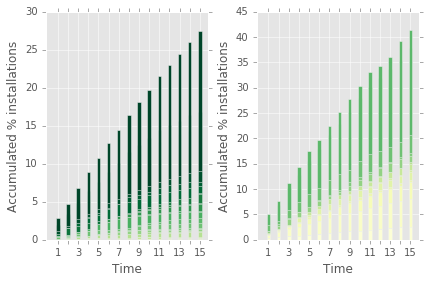

In [209]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(bottom=0.25)




ind = np.arange(N_TICKS)    # the x locations for the groups
ind = ind + 1
width = 0.35       # the width of the bars: can also be len(x) sequence

norm = matplotlib.colors.Normalize(vmin=0, vmax=N_BINS_INCOME - 1)
cmap_custom = cm.get_cmap('YlGn')
incomes = norm(range(N_BINS_INCOME))
colors_income = []

for income_ in incomes:
    colors_income.append(cmap_custom(income_))


p1 = axes[0].bar(ind[0:N_TICKS_DISPLAY], ticks_income_penetration_acc[:, 0][0:N_TICKS_DISPLAY] * 100,\
                 width, color=colors_income[0])

for bin_ in range(1, N_BINS_INCOME, 1):
    p2 = axes[0].bar(ind[0:N_TICKS_DISPLAY], \
                     ticks_income_penetration_acc[:, bin_][0:N_TICKS_DISPLAY] * 100, \
                     width, color=colors_income[bin_], \
                  bottom=ticks_income_penetration_acc[:, bin_ - 1][0:N_TICKS_DISPLAY] * 100)


axes[0].set_xlabel("Time")
axes[0].set_ylabel("Accumulated % installations")
#axes[0].set_title('Accumulated % installations \n by the level \n of income', fontsize=10)


axes[0].set_xticks(ind[0:N_TICKS_DISPLAY] + width / 2)
axes[0].set_xticklabels(ind[0:N_TICKS_DISPLAY])
x_labels = ['1', '', '3', '', '5', '', '7', '', '9', '', '11', '', '13', '', '15']
axes[0].set_xticklabels(x_labels)

elects = norm(range(N_BINS_ELECT))
colors_elect = []



for elect_ in elects:
    colors_elect.append(cmap_custom(elect_))


p1 = axes[1].bar(ind[0:N_TICKS_DISPLAY], ticks_elect_penetration_acc[:, 0][0:N_TICKS_DISPLAY] * 100, \
                 width, color=colors_elect[0])

for bin_ in range(1, N_BINS_ELECT, 1):
    p2 = axes[1].bar(ind[0:N_TICKS_DISPLAY], ticks_elect_penetration_acc[:, bin_][0:N_TICKS_DISPLAY] * 100, \
                     width, color=colors_income[bin_], \
                  bottom=ticks_elect_penetration_acc[:, bin_ - 1][0:N_TICKS_DISPLAY] * 100)

axes[1].set_xticks(ind[0:N_TICKS_DISPLAY] + width / 2)
axes[1].set_xticklabels(x_labels)
    
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Accumulated % installations")
#axes[1].set_title('Accumulated % installations \n by the level \n of electricity consumption', fontsize=10)
    

plt.tight_layout()
plt.savefig('Simulation_results_dist_' + data_mode + '_' + test_name + '.png', dpi=300)
plt.show()


## How to draw graphs below
[1](http://matplotlib.org/1.4.1/examples/ticks_and_spines/spines_demo_bounds.html)
[2](http://matplotlib.org/1.4.1/examples/pylab_examples/multiple_yaxis_with_spines.html)
[3](http://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
[4](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot)

## Dynamics of installations

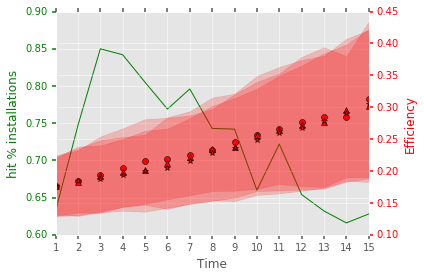

In [175]:


fig, host = plt.subplots()
fig.subplots_adjust(right=0.85)

par1 = host.twinx()

ind = df.index.values[0:N_TICKS_DISPLAY] + 1

p1, = host.plot(ind, df['N_installed'][0:N_TICKS_DISPLAY]/1000*100, "g-", label="% installations")
p2, = par1.plot(ind, df['sei_0'][0:N_TICKS_DISPLAY], "ro", label=r'$er\pm 2\sigma$')
p3, = par1.plot(ind, df['sei_1'][0:N_TICKS_DISPLAY], "r^", label=r'$el\pm 2\sigma$')
p4, = par1.plot(ind, df['sei_2'][0:N_TICKS_DISPLAY], "r*", label=r'$el\pm 2\sigma$')

par1.fill_between(ind, 
                  df['sei_0'][0:N_TICKS_DISPLAY]-2*df_std['sei_0'][0:N_TICKS_DISPLAY], 
                  df['sei_0'][0:N_TICKS_DISPLAY]+2*df_std['sei_0'][0:N_TICKS_DISPLAY], 
                  color='r', 
                  alpha=0.2)

par1.fill_between(ind, 
                  df['sei_1'][0:N_TICKS_DISPLAY]-2*df_std['sei_1'][0:N_TICKS_DISPLAY], 
                  df['sei_1'][0:N_TICKS_DISPLAY]+2*df_std['sei_1'][0:N_TICKS_DISPLAY], 
                  color='r', 
                  alpha=0.2)

par1.fill_between(ind, 
                  df['sei_2'][0:N_TICKS_DISPLAY]-2*df_std['sei_2'][0:N_TICKS_DISPLAY], 
                  df['sei_2'][0:N_TICKS_DISPLAY]+2*df_std['sei_2'][0:N_TICKS_DISPLAY], 
                  color='r', 
                  alpha=0.2)


host.set_xlabel("Time")
host.set_ylabel("hit % installations")


host.set_autoscaley_on(False)
host.set_xlim([1,15])
start = 1
end = 16
host.xaxis.set_ticks(np.arange(start, end, 1))

par1.set_ylabel("Efficiency")


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())


tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

if test_name == 'RelSelf':
    host.legend(lines, [l.get_label() for l in lines], fontsize='11', loc=0, borderaxespad=0., bbox_to_anchor=(1.0, 1.0))

if test_name == 'RelAv':
    host.legend(lines, [l.get_label() for l in lines], fontsize='11', loc=0, borderaxespad=0., bbox_to_anchor=(0.5, 0.65))

plt.savefig('Simulation_results1_' + data_mode + '_' + test_name + '.png', dpi=300)
plt.show()



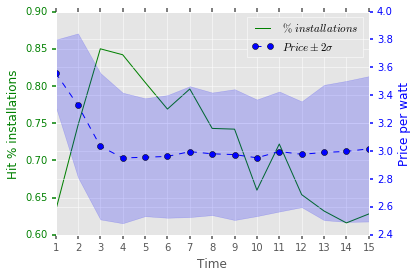

In [179]:
fig, host = plt.subplots()
fig.subplots_adjust(right=0.85)

par1 = host.twinx()

ind = df.index.values[0:N_TICKS_DISPLAY] + 1

p1, = host.plot(ind, df['N_installed'][0:N_TICKS_DISPLAY]/1000*100, "g-", \
#                label=r'$\%\ installations\pm 2\sigma$')
                label=r'$\%\ installations$')
p2, = par1.plot(ind, df['P_av'][0:N_TICKS_DISPLAY], "--bo", label=r'$Price\pm 2\sigma$')

#add +- 2 std
#host.fill_between(ind, 
#                  df['N_installed'][0:N_TICKS_DISPLAY]/1000*100-2*df_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  df['N_installed'][0:N_TICKS_DISPLAY]/1000*100+2*df_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  color='g', 
#                  alpha=0.2)

par1.fill_between(ind, 
                 df['P_av'][0:N_TICKS_DISPLAY]-2*df_std['P_av'][0:N_TICKS_DISPLAY],
                 df['P_av'][0:N_TICKS_DISPLAY]+2*df_std['P_av'][0:N_TICKS_DISPLAY],
                  color='b', 
                  alpha=0.2)

host.set_xlabel("Time")
host.set_ylabel("Hit % installations")
par1.set_ylabel("Price per watt")

host.set_autoscaley_on(False)
host.set_xlim([1,15])
start = 1
end = 16
host.xaxis.set_ticks(np.arange(start, end, 1))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())


tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines], fontsize='11')
plt.savefig('Simulation_results2_' + data_mode + '_' + test_name +'.png', dpi=300)
plt.show()

## SEI relative to an aggregate

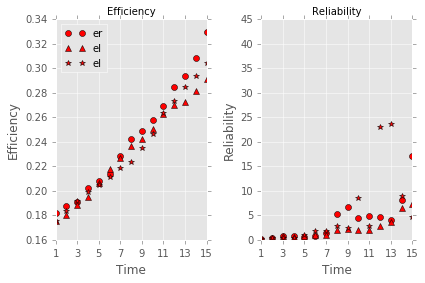

In [189]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(bottom=0.25)




ind = np.arange(N_TICKS)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

ind = df.index.values[0:N_TICKS_DISPLAY] + 1

#p1, = axes[0].plot(ind, df['sem_max'][0:N_TICKS_DISPLAY], "g-", label="max")    
p2, = axes[0].plot(ind, df['sei_0'][0:N_TICKS_DISPLAY], "ro", label="er")
p3, = axes[0].plot(ind, df['sei_1'][0:N_TICKS_DISPLAY], "r^", label="el")
p4, = axes[0].plot(ind, df['sei_2'][0:N_TICKS_DISPLAY], "r*", label="el")


#axes[0].fill_between(ind, 
#                  df['sem_max'][0:N_TICKS_DISPLAY]-2*df_std['sem_max'][0:N_TICKS_DISPLAY], 
#                  df['sem_max'][0:N_TICKS_DISPLAY]+2*df_std['sem_max'][0:N_TICKS_DISPLAY], 
#                  color='g', 
#                  alpha=0.2)

#axes[0].fill_between(ind, 
#                  df['sei_0'][0:N_TICKS_DISPLAY]-2*df_std['sei_0'][0:N_TICKS_DISPLAY], 
#                  df['sei_0'][0:N_TICKS_DISPLAY]+2*df_std['sei_0'][0:N_TICKS_DISPLAY], 
#                  color='r', 
#                  alpha=0.2)

#axes[0].fill_between(ind, 
#                  df['sei_1'][0:N_TICKS_DISPLAY]-2*df_std['sei_1'][0:N_TICKS_DISPLAY], 
#                  df['sei_1'][0:N_TICKS_DISPLAY]+2*df_std['sei_1'][0:N_TICKS_DISPLAY], 
#                  color='r', 
#                  alpha=0.2)

#axes[0].fill_between(ind, 
#                  df['sei_2'][0:N_TICKS_DISPLAY]-2*df_std['sei_2'][0:N_TICKS_DISPLAY], 
#                  df['sei_2'][0:N_TICKS_DISPLAY]+2*df_std['sei_2'][0:N_TICKS_DISPLAY], 
#                  color='r', 
#                  alpha=0.2)


#lines = [p1, p2, p3, p4]
lines = [p2, p3, p4]
axes[0].legend(lines, [l.get_label() for l in lines], fontsize='10', loc=2)

axes[0].set_xlabel("Time")
axes[0].set_ylabel("Efficiency")
#axes[0].set_title('Efficiency relative to the \n maximum available', fontsize=10)
axes[0].set_title('Efficiency', fontsize=10)

axes[0].set_autoscaley_on(False)
axes[0].set_xlim([1,15])
start = 1
end = 16
axes[0].xaxis.set_ticks(np.arange(start, end, 2))


#agents_to_show = ['sem_rel_min'] + ['sei_rel_' + str(i) for i in range(3)]
#markers = ["g-", "ro", "r^", "r*"]
#colors = ['g', 'r', 'r', 'r']
#labels = ["min", "er", "el", "el"]


agents_to_show = ['sei_rel_' + str(i) for i in range(3)]
markers = ["ro", "r^", "r*"]
colors = ['r', 'r', 'r']
labels = ["er", "el", "el"]

i = 0
lines = []

for agent in agents_to_show:
    pi, = axes[1].plot(ind, df[agent][0:N_TICKS_DISPLAY], markers[i], label=labels[i])
    lines.append(pi)
    i = i + 1

#i = 0
#for agent in agents_to_show:
#    axes[1].fill_between(ind, 
#                  df[agent][0:N_TICKS_DISPLAY]-2*df_std[agent][0:N_TICKS_DISPLAY], 
#                  df[agent][0:N_TICKS_DISPLAY]+2*df_std[agent][0:N_TICKS_DISPLAY], 
#                  color=colors[i], 
#                  alpha=0.2)
#    i = i + 1
    

#axes[1].legend(lines, [l.get_label() for l in lines], fontsize='10', loc=2)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Reliability")
#axes[1].set_title('Reliability relative to the \n minimum available', fontsize=10)
axes[1].set_title('Reliability', fontsize=10)
    
axes[1].set_autoscaley_on(False)
axes[1].set_xlim([1,15])
axes[1].set_ylim([0, 45])
axes[1].xaxis.set_ticks(np.arange(start, end, 2))
    
plt.tight_layout()
plt.savefig('Simulation_results_relatives_' + data_mode + '_' + test_name +'.png', dpi=300)
plt.show()

In [154]:
#some files have nans in them - check
#concurrency bug - in accessing pv projects - check